Установка библиотек

In [ ]:
! git clone https://github.com/cbluebenchmark/cblue

In [ ]:
! pip install jieba

In [ ]:
! pip install gensim

In [ ]:
! pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install git+https://github.com/sinovation/ZEN

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/sinovation/ZEN to /tmp/pip-req-build-jaueqsd8
  Running command git clone --filter=blob:none --quiet https://github.com/sinovation/ZEN /tmp/pip-req-build-jaueqsd8
  Resolved https://github.com/sinovation/ZEN to commit d5d9008b19643ae06647a390266030cbf1c1c63c
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 10.5 MB/s eta 0:00:00
  Created wheel for ZEN: filename=ZEN-0.1.0-py3-none-any.whl size=32503 sha256=d81b0020aa19f886830938b7c1a25a9c2a6156559cb53c7a6b767ee7b6638228
  Stored in directory: /tmp/pip-ephem-wheel-cache-_1sm_1di/wheels/12/fc/a2/9bc51ebe2f1d8e7ff3e6b09e98051ac69c710a4fc34aa72b41
Successfully built ZEN


In [ ]:
!pip install transformers
!pip install torch torchvision torchaudio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 69.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Импортируем зависимости

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import argparse
import matplotlib.pyplot as plt

from numpy import arange

from ZEN.modeling import ZenModel

from cblue.data import EEDataProcessor, EEDataset
from cblue.trainer import EETrainer
from cblue.metrics import ee_metric, ee_commit_prediction

from cblue.models import CDNForCLSModel
from cblue.trainer import CDNForCLSTrainer, CDNForNUMTrainer
from cblue.utils import init_logger, seed_everything
from cblue.data import CDNDataset, CDNDataProcessor
from cblue.models import save_zen_model, ZenModel, ZenForSequenceClassification, ZenNgramDict

from transformers import BertTokenizer, BertModel, AlbertModel, BertForSequenceClassification, \
    AlbertForSequenceClassification, BertForTokenClassification, AlbertForTokenClassification, RobertaTokenizer, AutoTokenizer

# Новый раздел

Загружаем датасет

In [ ]:
data_processor = EEDataProcessor('/content/')
train_samples = data_processor.get_train_sample()
eval_samples = data_processor.get_dev_sample()
test_samples = data_processor.get_test_sample()


In [ ]:
from transformers import BertTokenizer, BertModel, AlbertModel, BertForSequenceClassification, AlbertForSequenceClassification, BertForTokenClassification, AlbertForTokenClassification



Загружаем модель

In [ ]:
from transformers import (
  BertTokenizerFast,
  AutoModel,
)


In [ ]:
from transformers import (RobertaForTokenClassification )

In [ ]:
tokenizer = BertTokenizer.from_pretrained("hfl/chinese-roberta-wwm-ext-large")
model = RobertaForTokenClassification.from_pretrained("hfl/chinese-roberta-wwm-ext-large", num_labels=data_processor.num_labels)

You are using a model of type bert to instantiate a model of type roberta. This is not supported for all configurations of models and can yield errors.
Some weights of the model checkpoint at hfl/chinese-roberta-wwm-ext-large were not used when initializing RobertaForTokenClassification: ['bert.encoder.layer.0.attention.output.dense.weight', 'bert.encoder.layer.1.output.LayerNorm.bias', 'bert.encoder.layer.7.output.LayerNorm.weight', 'bert.encoder.layer.2.output.dense.weight', 'bert.encoder.layer.1.attention.output.dense.bias', 'bert.encoder.layer.0.attention.self.key.weight', 'bert.encoder.layer.17.output.dense.weight', 'bert.encoder.layer.5.output.dense.bias', 'bert.encoder.layer.10.attention.self.value.bias', 'bert.encoder.layer.10.output.dense.weight', 'bert.encoder.layer.19.attention.self.query.bias', 'bert.encoder.layer.3.output.LayerNorm.weight', 'bert.encoder.layer.2.attention.output.dense.weight', 'bert.encoder.layer.15.attention.output.LayerNorm.weight', 'bert.encoder.layer.1

In [ ]:
train_dataset = EEDataset(train_samples, data_processor, tokenizer=tokenizer, mode='train', model_type = 'roberta', max_length=128)
eval_dataset = EEDataset(eval_samples, data_processor, tokenizer=tokenizer, mode='eval', model_type = 'roberta', max_length=128)
test_dataset = EEDataset(test_samples, data_processor, tokenizer=tokenizer, mode='test', model_type = 'roberta', max_length=128)


Гиперпараметры

In [ ]:
logger = init_logger('test.txt')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class Args:
  def __init__(self):
    self.model_type = "roberta"
    self.model_dir = "hfl/chinese-roberta-wwm-ext-large"
    self.model_name = "chinese-roberta-wwm-ext-large"
    self.output_dir = "/content/output"
    self.result_output_dir = "/content/output_result"
    self.task_name =  "ee"
    self.device = device
    self.train_batch_size = 24
    self.eval_batch_size = 24
    self.epochs = 3
    self.warmup_proportion = 0.1
    self.weight_decay = 0.01
    self.learning_rate = 2e-5
    self.adam_epsilon = 1e-8
    self.max_grad_norm = 1.0
    self.max_length = 128
    self.task_name = "ee"
    self.logging_steps = 50
    self.earlystop_patience = 10
    self.return_dict = False

In [ ]:
args = Args()

In [ ]:
!pip install -Uqq ipdb
import ipdb

In [ ]:
%pdb on

# Тренировка модели

In [ ]:
trainer = EETrainer(args, model, data_processor, tokenizer, logger, RobertaForTokenClassification, train_dataset, eval_dataset)
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
06/07/2023 18:25:48 - INFO - root -   ***** Running training *****
06/07/2023 18:25:48 - INFO - root -   Num samples 23025
06/07/2023 18:25:48 - INFO - root -   Num epochs 3
06/07/2023 18:25:48 - INFO - root -   Num training steps 2880
06/07/2023 18:25:48 - INFO - root -   Num warmup steps 288


[Training] 49/960 [>.............................] - ETA: 24:14  loss: 1.4310 

06/07/2023 18:27:08 - INFO - root -   ***** Running evaluation *****
06/07/2023 18:27:08 - INFO - root -   Num samples 5000


[Training] 50/960 [>.............................] - ETA: 24:12  loss: 1.5365 


06/07/2023 18:28:50 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6085872639531604 - recall: 0.6085872639531604 - f1 score: 0.6085872639531604
06/07/2023 18:28:55 - INFO - root -   Saving models checkpoint to /content/output/checkpoint-50


[Training] 99/960 [==>...........................] - ETA: 38:20  loss: 1.0016 

06/07/2023 18:30:14 - INFO - root -   ***** Running evaluation *****
06/07/2023 18:30:14 - INFO - root -   Num samples 5000


[Training] 100/960 [==>...........................] - ETA: 38:08  loss: 1.2494 


06/07/2023 18:31:57 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6085872639531604 - recall: 0.6085872639531604 - f1 score: 0.6085872639531604
06/07/2023 18:31:57 - INFO - root -   Earlystopper counter: 1 out of 10


[Training] 149/960 [===>..........................] - ETA: 40:30  loss: 1.1922 

06/07/2023 18:33:16 - INFO - root -   ***** Running evaluation *****
06/07/2023 18:33:16 - INFO - root -   Num samples 5000


[Training] 150/960 [===>..........................] - ETA: 40:19  loss: 1.1525 


06/07/2023 18:34:59 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6095554657660611 - recall: 0.6095554657660611 - f1 score: 0.6095554657660611
06/07/2023 18:35:09 - INFO - root -   Saving models checkpoint to /content/output/checkpoint-150


[Training] 199/960 [=====>........................] - ETA: 40:42  loss: 1.1691 

06/07/2023 18:36:28 - INFO - root -   ***** Running evaluation *****
06/07/2023 18:36:28 - INFO - root -   Num samples 5000


[Training] 200/960 [=====>........................] - ETA: 40:32  loss: 1.0206 


06/07/2023 18:38:11 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6126011084767212 - recall: 0.6126011084767212 - f1 score: 0.6126011084767212
06/07/2023 18:38:17 - INFO - root -   Saving models checkpoint to /content/output/checkpoint-200


[Training] 249/960 [======>.......................] - ETA: 39:21  loss: 1.0919 

06/07/2023 18:39:37 - INFO - root -   ***** Running evaluation *****
06/07/2023 18:39:37 - INFO - root -   Num samples 5000


[Training] 250/960 [======>.......................] - ETA: 39:12  loss: 0.9523 


06/07/2023 18:41:19 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.620342911161766 - recall: 0.620342911161766 - f1 score: 0.620342911161766
06/07/2023 18:41:33 - INFO - root -   Saving models checkpoint to /content/output/checkpoint-250


[Training] 299/960 [========>.....................] - ETA: 37:41  loss: 1.2981 

06/07/2023 18:42:53 - INFO - root -   ***** Running evaluation *****
06/07/2023 18:42:53 - INFO - root -   Num samples 5000


[Training] 300/960 [========>.....................] - ETA: 37:33  loss: 1.0530 


06/07/2023 18:44:35 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6086558766800588 - recall: 0.6086558766800588 - f1 score: 0.6086558766800588
06/07/2023 18:44:35 - INFO - root -   Earlystopper counter: 1 out of 10


[Training] 349/960 [=========>....................] - ETA: 35:09  loss: 1.0920 

06/07/2023 18:45:55 - INFO - root -   ***** Running evaluation *****
06/07/2023 18:45:55 - INFO - root -   Num samples 5000


[Training] 350/960 [=========>....................] - ETA: 35:03  loss: 0.9287 


06/07/2023 18:47:37 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6115871648458882 - recall: 0.6115871648458882 - f1 score: 0.6115871648458882
06/07/2023 18:47:37 - INFO - root -   Earlystopper counter: 2 out of 10


[Training] 399/960 [===========>..................] - ETA: 32:30  loss: 0.6528 

06/07/2023 18:48:57 - INFO - root -   ***** Running evaluation *****
06/07/2023 18:48:57 - INFO - root -   Num samples 5000


[Training] 400/960 [===========>..................] - ETA: 32:23  loss: 1.2090 


06/07/2023 18:50:39 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6140953411958436 - recall: 0.6140953411958436 - f1 score: 0.6140953411958436
06/07/2023 18:50:39 - INFO - root -   Earlystopper counter: 3 out of 10


[Training] 449/960 [=============>................] - ETA: 29:45  loss: 0.9786 

06/07/2023 18:51:59 - INFO - root -   ***** Running evaluation *****
06/07/2023 18:51:59 - INFO - root -   Num samples 5000


[Training] 450/960 [=============>................] - ETA: 29:39  loss: 0.8776 


06/07/2023 18:53:41 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.622523271149873 - recall: 0.622523271149873 - f1 score: 0.622523271149873
06/07/2023 18:53:59 - INFO - root -   Saving models checkpoint to /content/output/checkpoint-450


[Training] 499/960 [==============>...............] - ETA: 27:14  loss: 0.7592 

06/07/2023 18:55:19 - INFO - root -   ***** Running evaluation *****
06/07/2023 18:55:19 - INFO - root -   Num samples 5000


[Training] 500/960 [==============>...............] - ETA: 27:09  loss: 0.5927 


06/07/2023 18:57:02 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.631309512011039 - recall: 0.631309512011039 - f1 score: 0.631309512011039
06/07/2023 18:57:14 - INFO - root -   Saving models checkpoint to /content/output/checkpoint-500


[Training] 549/960 [================>.............] - ETA: 24:30  loss: 0.8555 

06/07/2023 18:58:34 - INFO - root -   ***** Running evaluation *****
06/07/2023 18:58:34 - INFO - root -   Num samples 5000


[Training] 550/960 [================>.............] - ETA: 24:25  loss: 0.8316 


06/07/2023 19:00:17 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6221420893337705 - recall: 0.6221420893337705 - f1 score: 0.6221420893337705
06/07/2023 19:00:17 - INFO - root -   Earlystopper counter: 1 out of 10


[Training] 599/960 [=================>............] - ETA: 21:33  loss: 0.9156 

06/07/2023 19:01:36 - INFO - root -   ***** Running evaluation *****
06/07/2023 19:01:36 - INFO - root -   Num samples 5000


[Training] 600/960 [=================>............] - ETA: 21:28  loss: 1.1562 


06/07/2023 19:03:18 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.5564492151466407 - recall: 0.5564492151466407 - f1 score: 0.5564492151466407
06/07/2023 19:03:18 - INFO - root -   Earlystopper counter: 2 out of 10


[Training] 649/960 [===================>..........] - ETA: 18:35  loss: 1.2220 

06/07/2023 19:04:38 - INFO - root -   ***** Running evaluation *****
06/07/2023 19:04:38 - INFO - root -   Num samples 5000


[Training] 650/960 [===================>..........] - ETA: 18:31  loss: 0.7362 


06/07/2023 19:06:20 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6047563867013288 - recall: 0.6047563867013288 - f1 score: 0.6047563867013288
06/07/2023 19:06:20 - INFO - root -   Earlystopper counter: 3 out of 10


[Training] 699/960 [====================>.........] - ETA: 15:37  loss: 0.7726 

06/07/2023 19:07:40 - INFO - root -   ***** Running evaluation *****
06/07/2023 19:07:40 - INFO - root -   Num samples 5000


[Training] 700/960 [====================>.........] - ETA: 15:32  loss: 0.8280 


06/07/2023 19:09:22 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6353042974437948 - recall: 0.6353042974437948 - f1 score: 0.6353042974437948
06/07/2023 19:09:32 - INFO - root -   Saving models checkpoint to /content/output/checkpoint-700


[Training] 749/960 [======================>.......] - ETA: 12:41  loss: 0.7630 

06/07/2023 19:10:52 - INFO - root -   ***** Running evaluation *****
06/07/2023 19:10:52 - INFO - root -   Num samples 5000


[Training] 750/960 [======================>.......] - ETA: 12:36  loss: 0.9374 


06/07/2023 19:12:34 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6360895319849662 - recall: 0.6360895319849662 - f1 score: 0.6360895319849662
06/07/2023 19:12:47 - INFO - root -   Saving models checkpoint to /content/output/checkpoint-750


[Training] 799/960 [=======================>......] - ETA: 9:43  loss: 0.5026 

06/07/2023 19:14:06 - INFO - root -   ***** Running evaluation *****
06/07/2023 19:14:06 - INFO - root -   Num samples 5000


[Training] 800/960 [========================>.....] - ETA: 9:39  loss: 0.7894 


06/07/2023 19:15:49 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6400500110542726 - recall: 0.6400500110542726 - f1 score: 0.6400500110542726
06/07/2023 19:15:59 - INFO - root -   Saving models checkpoint to /content/output/checkpoint-800


[Training] 849/960 [=========================>....] - ETA: 6:43  loss: 0.7444 

06/07/2023 19:17:18 - INFO - root -   ***** Running evaluation *****
06/07/2023 19:17:18 - INFO - root -   Num samples 5000


[Training] 850/960 [=========================>....] - ETA: 6:39  loss: 0.8288 


06/07/2023 19:19:01 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6361543328937036 - recall: 0.6361543328937036 - f1 score: 0.6361543328937036
06/07/2023 19:19:01 - INFO - root -   Earlystopper counter: 1 out of 10


[Training] 899/960 [===========================>..] - ETA: 3:41  loss: 0.6139 

06/07/2023 19:20:21 - INFO - root -   ***** Running evaluation *****
06/07/2023 19:20:21 - INFO - root -   Num samples 5000


[Training] 900/960 [===========================>..] - ETA: 3:38  loss: 0.6066 


06/07/2023 19:22:03 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6500064800908737 - recall: 0.6500064800908737 - f1 score: 0.6500064800908737
06/07/2023 19:22:13 - INFO - root -   Saving models checkpoint to /content/output/checkpoint-900


[Training] 949/960 [============================>.] - ETA: 40s  loss: 0.8863 

06/07/2023 19:23:32 - INFO - root -   ***** Running evaluation *****
06/07/2023 19:23:32 - INFO - root -   Num samples 5000


[Training] 950/960 [============================>.] - ETA: 36s  loss: 0.5313 


06/07/2023 19:25:15 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.643126148310221 - recall: 0.643126148310221 - f1 score: 0.643126148310221
06/07/2023 19:25:15 - INFO - root -   Earlystopper counter: 1 out of 10


[Training] 39/960 [>.............................] - ETA: 24:17  loss: 0.3808 

06/07/2023 19:26:34 - INFO - root -   ***** Running evaluation *****
06/07/2023 19:26:34 - INFO - root -   Num samples 5000


[Training] 40/960 [>.............................] - ETA: 24:17  loss: 0.3838 


06/07/2023 19:28:17 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6357045383507025 - recall: 0.6357045383507025 - f1 score: 0.6357045383507025
06/07/2023 19:28:17 - INFO - root -   Earlystopper counter: 2 out of 10


[Training] 89/960 [=>............................] - ETA: 39:50  loss: 1.0954 

06/07/2023 19:29:36 - INFO - root -   ***** Running evaluation *****
06/07/2023 19:29:36 - INFO - root -   Num samples 5000


[Training] 90/960 [=>............................] - ETA: 39:36  loss: 0.8475 


06/07/2023 19:31:19 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6466940101089418 - recall: 0.6466940101089418 - f1 score: 0.6466940101089418
06/07/2023 19:31:19 - INFO - root -   Earlystopper counter: 3 out of 10


[Training] 139/960 [===>..........................] - ETA: 41:57  loss: 0.5538 

06/07/2023 19:32:38 - INFO - root -   ***** Running evaluation *****
06/07/2023 19:32:38 - INFO - root -   Num samples 5000


[Training] 140/960 [===>..........................] - ETA: 41:45  loss: 1.0003 


06/07/2023 19:34:21 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6460498128397283 - recall: 0.6460498128397283 - f1 score: 0.6460498128397283
06/07/2023 19:34:21 - INFO - root -   Earlystopper counter: 4 out of 10


[Training] 189/960 [====>.........................] - ETA: 41:19  loss: 0.7023 

06/07/2023 19:35:40 - INFO - root -   ***** Running evaluation *****
06/07/2023 19:35:40 - INFO - root -   Num samples 5000


[Training] 190/960 [====>.........................] - ETA: 41:10  loss: 0.6816 


06/07/2023 19:37:22 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6486952146434807 - recall: 0.6486952146434807 - f1 score: 0.6486952146434807
06/07/2023 19:37:22 - INFO - root -   Earlystopper counter: 5 out of 10


[Training] 239/960 [======>.......................] - ETA: 39:42  loss: 0.4473 

06/07/2023 19:38:42 - INFO - root -   ***** Running evaluation *****
06/07/2023 19:38:42 - INFO - root -   Num samples 5000


[Training] 240/960 [======>.......................] - ETA: 39:34  loss: 0.6142 


06/07/2023 19:40:24 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6558881155133376 - recall: 0.6558881155133376 - f1 score: 0.6558881155133376
06/07/2023 19:40:29 - INFO - root -   Saving models checkpoint to /content/output/checkpoint-1200


[Training] 289/960 [========>.....................] - ETA: 37:47  loss: 0.9875 

06/07/2023 19:41:48 - INFO - root -   ***** Running evaluation *****
06/07/2023 19:41:48 - INFO - root -   Num samples 5000


[Training] 290/960 [========>.....................] - ETA: 37:39  loss: 0.5125 


06/07/2023 19:43:31 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6620289545707512 - recall: 0.6620289545707512 - f1 score: 0.6620289545707512
06/07/2023 19:43:43 - INFO - root -   Saving models checkpoint to /content/output/checkpoint-1250


[Training] 339/960 [=========>....................] - ETA: 35:44  loss: 0.6781 

06/07/2023 19:45:02 - INFO - root -   ***** Running evaluation *****
06/07/2023 19:45:02 - INFO - root -   Num samples 5000


[Training] 340/960 [=========>....................] - ETA: 35:37  loss: 0.7753 


06/07/2023 19:46:45 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6615867836640721 - recall: 0.6615867836640721 - f1 score: 0.6615867836640721
06/07/2023 19:46:45 - INFO - root -   Earlystopper counter: 1 out of 10


[Training] 389/960 [===========>..................] - ETA: 33:05  loss: 0.6559 

06/07/2023 19:48:04 - INFO - root -   ***** Running evaluation *****
06/07/2023 19:48:04 - INFO - root -   Num samples 5000


[Training] 390/960 [===========>..................] - ETA: 32:59  loss: 0.5353 


06/07/2023 19:49:47 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6650631618269283 - recall: 0.6650631618269283 - f1 score: 0.6650631618269283
06/07/2023 19:50:01 - INFO - root -   Saving models checkpoint to /content/output/checkpoint-1350


[Training] 439/960 [============>.................] - ETA: 30:37  loss: 0.7880 

06/07/2023 19:51:20 - INFO - root -   ***** Running evaluation *****
06/07/2023 19:51:20 - INFO - root -   Num samples 5000


[Training] 440/960 [============>.................] - ETA: 30:31  loss: 0.5657 


06/07/2023 19:53:03 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6635041281990683 - recall: 0.6635041281990683 - f1 score: 0.6635041281990683
06/07/2023 19:53:03 - INFO - root -   Earlystopper counter: 1 out of 10


[Training] 489/960 [==============>...............] - ETA: 27:46  loss: 0.3980 

06/07/2023 19:54:22 - INFO - root -   ***** Running evaluation *****
06/07/2023 19:54:22 - INFO - root -   Num samples 5000


[Training] 490/960 [==============>...............] - ETA: 27:41  loss: 0.5402 


06/07/2023 19:56:05 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6617773745721234 - recall: 0.6617773745721234 - f1 score: 0.6617773745721234
06/07/2023 19:56:05 - INFO - root -   Earlystopper counter: 2 out of 10


[Training] 539/960 [===============>..............] - ETA: 24:53  loss: 0.7476 

06/07/2023 19:57:25 - INFO - root -   ***** Running evaluation *****
06/07/2023 19:57:25 - INFO - root -   Num samples 5000


[Training] 540/960 [===============>..............] - ETA: 24:48  loss: 0.7931 


06/07/2023 19:59:07 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6641940672862142 - recall: 0.6641940672862142 - f1 score: 0.6641940672862142
06/07/2023 19:59:07 - INFO - root -   Earlystopper counter: 3 out of 10


[Training] 589/960 [=================>............] - ETA: 21:59  loss: 0.5609 

06/07/2023 20:00:27 - INFO - root -   ***** Running evaluation *****
06/07/2023 20:00:27 - INFO - root -   Num samples 5000


[Training] 590/960 [=================>............] - ETA: 21:54  loss: 0.4751 


06/07/2023 20:02:10 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.663446950926653 - recall: 0.663446950926653 - f1 score: 0.663446950926653
06/07/2023 20:02:10 - INFO - root -   Earlystopper counter: 4 out of 10


[Training] 639/960 [==================>...........] - ETA: 19:03  loss: 0.7065 

06/07/2023 20:03:29 - INFO - root -   ***** Running evaluation *****
06/07/2023 20:03:29 - INFO - root -   Num samples 5000


[Training] 640/960 [===================>..........] - ETA: 18:59  loss: 0.7323 


06/07/2023 20:05:11 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6593644936761937 - recall: 0.6593644936761937 - f1 score: 0.6593644936761937
06/07/2023 20:05:11 - INFO - root -   Earlystopper counter: 5 out of 10


[Training] 689/960 [====================>.........] - ETA: 16:07  loss: 0.6694 

06/07/2023 20:06:31 - INFO - root -   ***** Running evaluation *****
06/07/2023 20:06:31 - INFO - root -   Num samples 5000


[Training] 690/960 [====================>.........] - ETA: 16:02  loss: 0.3435 


06/07/2023 20:08:13 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6582971845911063 - recall: 0.6582971845911063 - f1 score: 0.6582971845911063
06/07/2023 20:08:13 - INFO - root -   Earlystopper counter: 6 out of 10


[Training] 739/960 [======================>.......] - ETA: 13:09  loss: 0.6735 

06/07/2023 20:09:33 - INFO - root -   ***** Running evaluation *****
06/07/2023 20:09:33 - INFO - root -   Num samples 5000


[Training] 740/960 [======================>.......] - ETA: 13:05  loss: 0.7216 


06/07/2023 20:11:15 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6658483963680997 - recall: 0.6658483963680997 - f1 score: 0.6658483963680997
06/07/2023 20:11:25 - INFO - root -   Saving models checkpoint to /content/output/checkpoint-1700


[Training] 789/960 [=======================>......] - ETA: 10:13  loss: 0.5296 

06/07/2023 20:12:45 - INFO - root -   ***** Running evaluation *****
06/07/2023 20:12:45 - INFO - root -   Num samples 5000


[Training] 790/960 [=======================>......] - ETA: 10:09  loss: 0.5483 


06/07/2023 20:14:27 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6717338436087245 - recall: 0.6717338436087245 - f1 score: 0.6717338436087245
06/07/2023 20:14:55 - INFO - root -   Saving models checkpoint to /content/output/checkpoint-1750


[Training] 839/960 [=========================>....] - ETA: 7:18  loss: 0.3557 

06/07/2023 20:16:15 - INFO - root -   ***** Running evaluation *****
06/07/2023 20:16:15 - INFO - root -   Num samples 5000


[Training] 840/960 [=========================>....] - ETA: 7:14  loss: 0.4738 


06/07/2023 20:17:58 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6603555663980606 - recall: 0.6603555663980606 - f1 score: 0.6603555663980606
06/07/2023 20:17:58 - INFO - root -   Earlystopper counter: 1 out of 10


[Training] 889/960 [==========================>...] - ETA: 4:17  loss: 0.5316 

06/07/2023 20:19:17 - INFO - root -   ***** Running evaluation *****
06/07/2023 20:19:17 - INFO - root -   Num samples 5000


[Training] 890/960 [==========================>...] - ETA: 4:13  loss: 0.7357 


06/07/2023 20:21:00 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6681088045375884 - recall: 0.6681088045375884 - f1 score: 0.6681088045375884
06/07/2023 20:21:00 - INFO - root -   Earlystopper counter: 2 out of 10


[Training] 939/960 [============================>.] - ETA: 1:16  loss: 0.5409 

06/07/2023 20:22:19 - INFO - root -   ***** Running evaluation *****
06/07/2023 20:22:19 - INFO - root -   Num samples 5000


[Training] 940/960 [============================>.] - ETA: 1:12  loss: 0.5805 


06/07/2023 20:24:02 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6682193472642581 - recall: 0.6682193472642581 - f1 score: 0.6682193472642581
06/07/2023 20:24:02 - INFO - root -   Earlystopper counter: 3 out of 10


[Training] 29/960 [..............................] - ETA: 24:32  loss: 0.7958 

06/07/2023 20:25:21 - INFO - root -   ***** Running evaluation *****
06/07/2023 20:25:21 - INFO - root -   Num samples 5000


[Training] 30/960 [..............................] - ETA: 24:30  loss: 0.6217 


06/07/2023 20:27:04 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6634507627448141 - recall: 0.6634507627448141 - f1 score: 0.6634507627448141
06/07/2023 20:27:04 - INFO - root -   Earlystopper counter: 4 out of 10


[Training] 79/960 [=>............................] - ETA: 42:23  loss: 0.6936 

06/07/2023 20:28:23 - INFO - root -   ***** Running evaluation *****
06/07/2023 20:28:23 - INFO - root -   Num samples 5000


[Training] 80/960 [=>............................] - ETA: 42:06  loss: 0.5379 


06/07/2023 20:30:06 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6668242218173224 - recall: 0.6668242218173224 - f1 score: 0.6668242218173224
06/07/2023 20:30:06 - INFO - root -   Earlystopper counter: 5 out of 10


[Training] 129/960 [===>..........................] - ETA: 44:04  loss: 0.7101 

06/07/2023 20:31:25 - INFO - root -   ***** Running evaluation *****
06/07/2023 20:31:25 - INFO - root -   Num samples 5000


[Training] 130/960 [===>..........................] - ETA: 43:50  loss: 0.4259 


06/07/2023 20:33:08 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.67138315633791 - recall: 0.67138315633791 - f1 score: 0.67138315633791
06/07/2023 20:33:08 - INFO - root -   Earlystopper counter: 6 out of 10


[Training] 179/960 [====>.........................] - ETA: 43:06  loss: 0.4469 

06/07/2023 20:34:28 - INFO - root -   ***** Running evaluation *****
06/07/2023 20:34:28 - INFO - root -   Num samples 5000


[Training] 180/960 [====>.........................] - ETA: 42:55  loss: 0.5020 


06/07/2023 20:36:11 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6607710545776124 - recall: 0.6607710545776124 - f1 score: 0.6607710545776124
06/07/2023 20:36:11 - INFO - root -   Earlystopper counter: 7 out of 10


[Training] 229/960 [======>.......................] - ETA: 41:14  loss: 0.6268 

06/07/2023 20:37:30 - INFO - root -   ***** Running evaluation *****
06/07/2023 20:37:30 - INFO - root -   Num samples 5000


[Training] 230/960 [======>.......................] - ETA: 41:05  loss: 0.6312 


06/07/2023 20:39:13 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6780576499378673 - recall: 0.6780576499378673 - f1 score: 0.6780576499378673
06/07/2023 20:39:22 - INFO - root -   Saving models checkpoint to /content/output/checkpoint-2150


[Training] 279/960 [=======>......................] - ETA: 39:18  loss: 0.4149 

06/07/2023 20:40:41 - INFO - root -   ***** Running evaluation *****
06/07/2023 20:40:41 - INFO - root -   Num samples 5000


[Training] 280/960 [=======>......................] - ETA: 39:10  loss: 0.6097 


06/07/2023 20:42:24 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6766282181274824 - recall: 0.6766282181274824 - f1 score: 0.6766282181274824
06/07/2023 20:42:24 - INFO - root -   Earlystopper counter: 1 out of 10


[Training] 329/960 [=========>....................] - ETA: 36:42  loss: 0.3675 

06/07/2023 20:43:43 - INFO - root -   ***** Running evaluation *****
06/07/2023 20:43:43 - INFO - root -   Num samples 5000


[Training] 330/960 [=========>....................] - ETA: 36:35  loss: 0.6151 


06/07/2023 20:45:26 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.676262283584024 - recall: 0.676262283584024 - f1 score: 0.676262283584024
06/07/2023 20:45:26 - INFO - root -   Earlystopper counter: 2 out of 10


[Training] 379/960 [==========>...................] - ETA: 34:00  loss: 0.6190 

06/07/2023 20:46:46 - INFO - root -   ***** Running evaluation *****
06/07/2023 20:46:46 - INFO - root -   Num samples 5000


[Training] 380/960 [==========>...................] - ETA: 33:53  loss: 0.7486 


06/07/2023 20:48:28 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6737236126887803 - recall: 0.6737236126887803 - f1 score: 0.6737236126887803
06/07/2023 20:48:28 - INFO - root -   Earlystopper counter: 3 out of 10


[Training] 429/960 [============>.................] - ETA: 31:12  loss: 0.4323 

06/07/2023 20:49:48 - INFO - root -   ***** Running evaluation *****
06/07/2023 20:49:48 - INFO - root -   Num samples 5000


[Training] 430/960 [============>.................] - ETA: 31:06  loss: 0.8167 


06/07/2023 20:51:31 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6645333191025455 - recall: 0.6645333191025455 - f1 score: 0.6645333191025455
06/07/2023 20:51:31 - INFO - root -   Earlystopper counter: 4 out of 10


[Training] 479/960 [=============>................] - ETA: 28:22  loss: 0.7187 

06/07/2023 20:52:50 - INFO - root -   ***** Running evaluation *****
06/07/2023 20:52:50 - INFO - root -   Num samples 5000


[Training] 480/960 [==============>...............] - ETA: 28:16  loss: 0.4830 


06/07/2023 20:54:33 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6786141753893772 - recall: 0.6786141753893772 - f1 score: 0.6786141753893772
06/07/2023 20:54:43 - INFO - root -   Saving models checkpoint to /content/output/checkpoint-2400


[Training] 529/960 [===============>..............] - ETA: 25:37  loss: 0.7310 

06/07/2023 20:56:02 - INFO - root -   ***** Running evaluation *****
06/07/2023 20:56:02 - INFO - root -   Num samples 5000


[Training] 530/960 [===============>..............] - ETA: 25:32  loss: 0.8997 


06/07/2023 20:57:45 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6737922254156787 - recall: 0.6737922254156787 - f1 score: 0.6737922254156787
06/07/2023 20:57:45 - INFO - root -   Earlystopper counter: 1 out of 10


[Training] 579/960 [=================>............] - ETA: 22:41  loss: 0.6143 

06/07/2023 20:59:05 - INFO - root -   ***** Running evaluation *****
06/07/2023 20:59:05 - INFO - root -   Num samples 5000


[Training] 580/960 [=================>............] - ETA: 22:37  loss: 0.5218 


06/07/2023 21:00:47 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6782406172095966 - recall: 0.6782406172095966 - f1 score: 0.6782406172095966
06/07/2023 21:00:47 - INFO - root -   Earlystopper counter: 2 out of 10


[Training] 629/960 [==================>...........] - ETA: 19:45  loss: 0.5134 

06/07/2023 21:02:07 - INFO - root -   ***** Running evaluation *****
06/07/2023 21:02:07 - INFO - root -   Num samples 5000


[Training] 630/960 [==================>...........] - ETA: 19:40  loss: 0.3634 


06/07/2023 21:03:50 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6797234144742359 - recall: 0.6797234144742359 - f1 score: 0.6797234144742359
06/07/2023 21:04:00 - INFO - root -   Saving models checkpoint to /content/output/checkpoint-2550


[Training] 679/960 [====================>.........] - ETA: 16:51  loss: 0.5949 

06/07/2023 21:05:19 - INFO - root -   ***** Running evaluation *****
06/07/2023 21:05:19 - INFO - root -   Num samples 5000


[Training] 680/960 [====================>.........] - ETA: 16:47  loss: 0.5378 


06/07/2023 21:07:02 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6771618726700261 - recall: 0.6771618726700261 - f1 score: 0.6771618726700261
06/07/2023 21:07:02 - INFO - root -   Earlystopper counter: 1 out of 10


[Training] 729/960 [=====================>........] - ETA: 13:52  loss: 0.7440 

06/07/2023 21:08:21 - INFO - root -   ***** Running evaluation *****
06/07/2023 21:08:21 - INFO - root -   Num samples 5000


[Training] 730/960 [=====================>........] - ETA: 13:48  loss: 0.4942 


06/07/2023 21:10:04 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6763728263106936 - recall: 0.6763728263106936 - f1 score: 0.6763728263106936
06/07/2023 21:10:04 - INFO - root -   Earlystopper counter: 2 out of 10


[Training] 779/960 [=======================>......] - ETA: 10:52  loss: 0.4745 

06/07/2023 21:11:23 - INFO - root -   ***** Running evaluation *****
06/07/2023 21:11:23 - INFO - root -   Num samples 5000


[Training] 780/960 [=======================>......] - ETA: 10:48  loss: 0.5065 


06/07/2023 21:13:06 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6817017480998087 - recall: 0.6817017480998087 - f1 score: 0.6817017480998087
06/07/2023 21:13:23 - INFO - root -   Saving models checkpoint to /content/output/checkpoint-2700


[Training] 829/960 [========================>.....] - ETA: 7:55  loss: 0.5512 

06/07/2023 21:14:43 - INFO - root -   ***** Running evaluation *****
06/07/2023 21:14:43 - INFO - root -   Num samples 5000


[Training] 830/960 [========================>.....] - ETA: 7:51  loss: 0.2836 


06/07/2023 21:16:26 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6798187099282615 - recall: 0.6798187099282615 - f1 score: 0.6798187099282615
06/07/2023 21:16:26 - INFO - root -   Earlystopper counter: 1 out of 10


[Training] 879/960 [==========================>...] - ETA: 4:53  loss: 0.4913 

06/07/2023 21:17:45 - INFO - root -   ***** Running evaluation *****
06/07/2023 21:17:45 - INFO - root -   Num samples 5000


[Training] 880/960 [==========================>...] - ETA: 4:50  loss: 0.4271 


06/07/2023 21:19:28 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6826928208216755 - recall: 0.6826928208216755 - f1 score: 0.6826928208216755
06/07/2023 21:19:38 - INFO - root -   Saving models checkpoint to /content/output/checkpoint-2800


[Training] 929/960 [============================>.] - ETA: 1:52  loss: 0.3938 

06/07/2023 21:20:57 - INFO - root -   ***** Running evaluation *****
06/07/2023 21:20:57 - INFO - root -   Num samples 5000


[Training] 930/960 [============================>.] - ETA: 1:49  loss: 0.5600 


06/07/2023 21:22:40 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6807830999230012 - recall: 0.6807830999230012 - f1 score: 0.6807830999230012
06/07/2023 21:22:40 - INFO - root -   Earlystopper counter: 1 out of 10


[Training] 959/960 [============================>.] - ETA: 3s  loss: 0.4266 

06/07/2023 21:23:27 - INFO - root -   Training Stop! The best step 2800: 0.6826928208216755


[Training] 960/960 [==============================] 3.7s/step  loss: 0.8073 

06/07/2023 21:23:46 - INFO - root -   Saving models checkpoint to /content/output


(2880, 2800)

In [ ]:
trainer.predict(model, test_dataset)

06/07/2023 21:24:08 - INFO - root -   ***** Running prediction *****
06/07/2023 21:24:08 - INFO - root -   Num samples 9868


[Prediction] 412/412 [==============================] 489.4ms/step

In [ ]:
trainer.evaluate(model)

06/07/2023 21:28:10 - INFO - root -   ***** Running evaluation *****
06/07/2023 21:28:10 - INFO - root -   Num samples 5000
06/07/2023 21:29:54 - INFO - root -   ee-chinese-roberta-wwm-ext-large precision: 0.6824298053685647 - recall: 0.6824298053685647 - f1 score: 0.6824298053685647


0.6824298053685647

# Графики

In [ ]:
loss_val_arr = []
loss_by_epochs = []
stopCount = int(len(trainer.predicts_outputs)/ args.epochs)

lossEpoch = 0
item_count = 0

for item in trainer.predicts_outputs:
  tensor = item[0]
  item_count += 1

  lossEpoch += tensor.item()
  loss_val_arr.append(tensor.item())

  if item_count == stopCount:
    loss_by_epochs.append(lossEpoch/stopCount)
    item_count = 0
    lossEpoch = 0

In [ ]:
loss_arr = []
loss_arr_by_epoch = []

for item in trainer.loss_array:
  tmp_loss = []
  loss = 0
  for tensor in item:
      loss += tensor.item()
      loss_arr.append(tensor.item())

  loss_arr_by_epoch.append(loss/len(trainer.loss_array[0]))

In [ ]:
trainer.loss_array

In [ ]:
if len(loss_val_arr) < len(loss_arr):
  for i in range(len(loss_val_arr), len(loss_arr)):
    loss_val_arr.append(0)

<ipython-input-47-38c6df0fae35>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss_arr, 'b', label='Training Loss', color='pink')
<ipython-input-47-38c6df0fae35>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss_val_arr[0:len(loss_arr)], 'b', label='Val Loss', color='green')


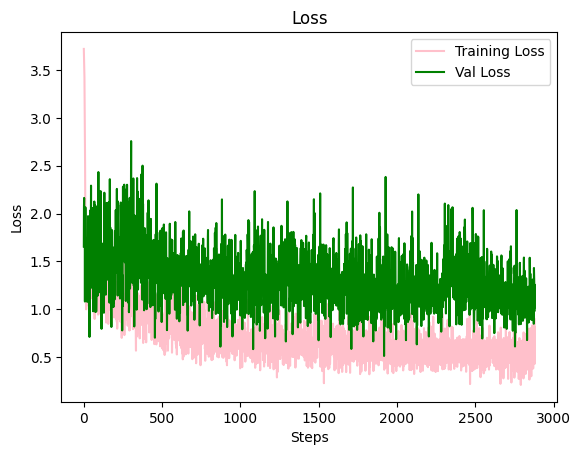

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(loss_arr) + 1)


plt.plot(epochs, loss_arr, 'b', label='Training Loss', color='pink')
plt.plot(epochs, loss_val_arr[0:len(loss_arr)], 'b', label='Val Loss', color='green')
plt.title('Loss')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

<ipython-input-45-e0ae6e1b77d8>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss_arr_by_epoch, 'b', label='Training Loss', color='pink')
<ipython-input-45-e0ae6e1b77d8>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss_by_epochs, 'b', label='Val Loss', color='green')


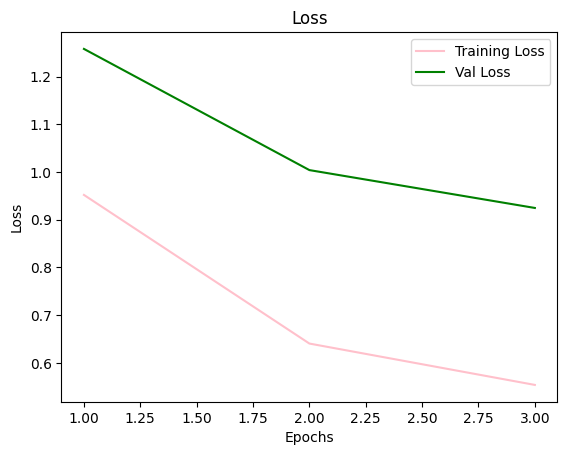

In [ ]:
epochs = range(1, args.epochs + 1)
plt.plot(epochs, loss_arr_by_epoch, 'b', label='Training Loss', color='pink')
plt.plot(epochs, loss_by_epochs, 'b', label='Val Loss', color='green')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Classification report


In [ ]:
!pip install seqeval

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16165 sha256=8f799517f97d07fa0a04acf6c88c6a38d5be93ae57959e369fd1154c1f4167ac
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


In [ ]:
#from sklearn.metrics import f1_score
from seqeval.metrics import classification_report, f1_score
import json

In [ ]:
f1 = open('/content/score_eval/test_data.json')
f2 = open('/content/output_result/CMeEE_test.json')

fullTestDataset = json.load(f1)
predictedTestDataset = json.load(f2)

In [ ]:
len(predictedTestDataset)

9868

In [ ]:
len(fullTestDataset)

9868

In [ ]:
trueLabels = []
predictedLabels = []
labelWrongOrNull = '-100'

for i in range(len(fullTestDataset)):
  tempTrue = []
  tempPredicted = []

  for j in range(len(fullTestDataset[i]['entities'])):
    itemTrue = fullTestDataset[i]['entities'][j]
    predictedItem = next((predictedItem['type'] for predictedItem in predictedTestDataset[i]['entities'] if  itemTrue['start_idx'] == predictedItem['start_idx'] and itemTrue['end_idx'] == predictedItem['end_idx']), labelWrongOrNull)

    tempTrue.append(itemTrue['type'])
    tempPredicted.append(predictedItem)

  predictedLabels.append(tempPredicted)
  trueLabels.append(tempTrue)


In [ ]:
print(len(predictedLabels))
print(len(trueLabels))

9868
9868


In [ ]:
report = classification_report(trueLabels, predictedLabels)

/usr/local/lib/python3.10/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: bod seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: dis seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: ite seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: dep seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: sym seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/sequence_labeling.py:171: Use

In [ ]:
micro_f1 = f1_score(trueLabels, predictedLabels)
macro_f1 = f1_score(trueLabels, predictedLabels, average='macro')

In [ ]:
print(report)

              precision    recall  f1-score   support

         100       0.00      0.00      0.00         0
          ep       1.00      0.94      0.97      1421
          ic       0.33      0.07      0.12       362
          is       0.37      0.09      0.15      3523
          od       0.43      0.13      0.20      3793
          qu       0.99      0.86      0.92      1229
          ro       0.31      0.05      0.09      1310
          ru       0.37      0.07      0.11      1275
          te       0.94      0.57      0.71      1358
          ym       0.15      0.04      0.06      2086

   micro avg       0.32      0.26      0.29     16357
   macro avg       0.49      0.28      0.33     16357
weighted avg       0.50      0.26      0.32     16357



In [ ]:
micro_f1

0.2860207844451894

In [ ]:
macro_f1

0.3337625221709553